# Support Vector Machines - Exercise 1

In this exercise, we'll be using support vector machines (SVMs) to build a spam classifier.  We'll start with SVMs on some simple 2D data sets to see how they work.  Then we'll do some pre-processing work on a set of raw emails and build a classifier on the processed emails using a SVM to determine if they are spam or not.

The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear SVM works on the data set for varying values of C (similar to the regularization term in linear/logistic regression).  Let's load the data.
## Exercise 1
#### 1. Load libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Load data
Load the file *ejer_1_data1.mat*. Find the way for loading this kind of file. **scipy.io.loadmat**

In [2]:
import scipy.io
mat = scipy.io.loadmat('data/ejer_1_data1.mat')

In [3]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [4]:
mat['X']

array([[1.9643  , 4.5957  ],
       [2.2753  , 3.8589  ],
       [2.9781  , 4.5651  ],
       [2.932   , 3.5519  ],
       [3.5772  , 2.856   ],
       [4.015   , 3.1937  ],
       [3.3814  , 3.4291  ],
       [3.9113  , 4.1761  ],
       [2.7822  , 4.0431  ],
       [2.5518  , 4.6162  ],
       [3.3698  , 3.9101  ],
       [3.1048  , 3.0709  ],
       [1.9182  , 4.0534  ],
       [2.2638  , 4.3706  ],
       [2.6555  , 3.5008  ],
       [3.1855  , 4.2888  ],
       [3.6579  , 3.8692  ],
       [3.9113  , 3.4291  ],
       [3.6002  , 3.1221  ],
       [3.0357  , 3.3165  ],
       [1.5841  , 3.3575  ],
       [2.0103  , 3.2039  ],
       [1.9527  , 2.7843  ],
       [2.2753  , 2.7127  ],
       [2.3099  , 2.9584  ],
       [2.8283  , 2.6309  ],
       [3.0473  , 2.2931  ],
       [2.4827  , 2.0373  ],
       [2.5057  , 2.3853  ],
       [1.8721  , 2.0577  ],
       [2.0103  , 2.3546  ],
       [1.2269  , 2.3239  ],
       [1.8951  , 2.9174  ],
       [1.561   , 3.0709  ],
       [1.5495

In [5]:
mat['y']

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]], dtype=uint8)

#### 3. Create a DataFrame with the features and target

In [6]:
df = pd.DataFrame(mat['X'], columns=['x1','x2'])
df['y'] = mat['y']
df

,x1,x2,y
0,1.964300,4.5957,1
1,2.275300,3.8589,1
2,2.978100,4.5651,1
3,2.932000,3.5519,1
4,3.577200,2.8560,1
5,4.015000,3.1937,1
6,3.381400,3.4291,1
7,3.911300,4.1761,1
8,2.782200,4.0431,1
9,2.551800,4.6162,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      51 non-null     float64
 1   x2      51 non-null     float64
 2   y       51 non-null     uint8  
dtypes: float64(2), uint8(1)
memory usage: 999.0 bytes


In [8]:
df.describe()

,x1,x2,y
count,51.000000,51.000000,51.000000
mean,2.268780,3.132512,0.411765
std,0.928531,0.753256,0.497050
min,0.086405,1.617700,0.000000
25%,1.572550,2.636000,0.000000
50%,2.275300,3.070900,0.000000
75%,2.955050,3.531400,1.000000
max,4.015000,4.616200,1.000000


In [9]:
df['y'].value_counts()

y
0    30
1    21
Name: count, dtype: int64

#### 4. Plot a scatterplot with the data

<Axes: xlabel='x1', ylabel='x2'>

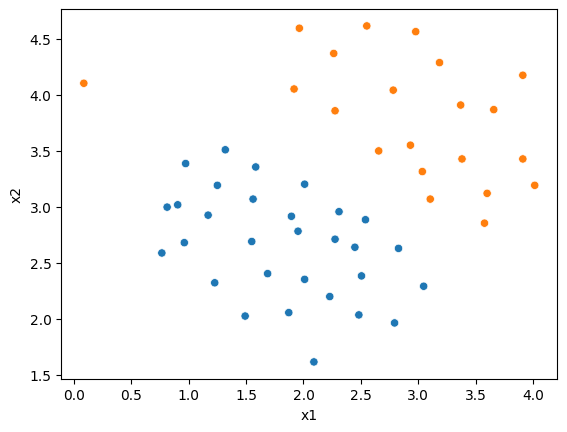

In [10]:
sns.scatterplot(data=df, x="x1", y="x2", hue="y", legend=False)

Notice that there is one outlier positive example that sits apart from the others.  The classes are still linearly separable but it's a very tight fit.  We're going to train a linear support vector machine to learn the class boundary.

#### 5. LinearSVC
Declare a Linear SVC with the hyperparamenters:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [11]:
from sklearn.svm import LinearSVC

svc_1 = LinearSVC(C=1, loss='hinge', max_iter=10000)

#### 6. Try the performance (score)
For the first experiment we'll use C=1 and see how it performs.

In [12]:
X = df[['x1','x2']]
y = df['y']

svc_1.fit(X, y)
svc_1.score(X,y)

0.9803921568627451

It appears that it mis-classified the outlier.

#### 7. Increase the value of C until you get a perfect classifier

In [13]:
svc_2 = LinearSVC(C=1000, loss='hinge', max_iter=1000000)

svc_2.fit(X, y)
svc_2.score(X,y)

1.0

This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

#### 8. Plot Decission Function
Get the `decision_function()` output for the first model. Plot a scatterplot with X1, X2 and a range of colors based on `decision_function()`

In [14]:
conf_level = svc_1.decision_function(X)
conf_level

array([ 0.80275309,  0.38383559,  1.3774035 ,  0.52108963,  0.33332616,
        0.86861697,  0.68644092,  1.61111839,  0.83440041,  1.16704838,
        1.07315445,  0.22973003,  0.33175019,  0.79572835,  0.31572055,
        1.27400517,  1.21010681,  0.99989034,  0.5646659 ,  0.38981627,
       -0.43529432, -0.30886833, -0.68627527, -0.55403536, -0.33252609,
       -0.29385403, -0.44071265, -0.98399475, -0.68564085, -1.32848812,
       -1.00380272, -1.49232397, -0.61143891, -0.68346721, -1.00005682,
       -1.15275748, -1.57842442, -1.35600603, -1.03242211, -1.18506966,
       -0.7714416 , -0.76695134, -0.46653002, -1.        , -0.51034683,
       -0.85863921, -1.5590304 , -0.25490667, -1.11367518, -1.54721657,
       -0.70999121])

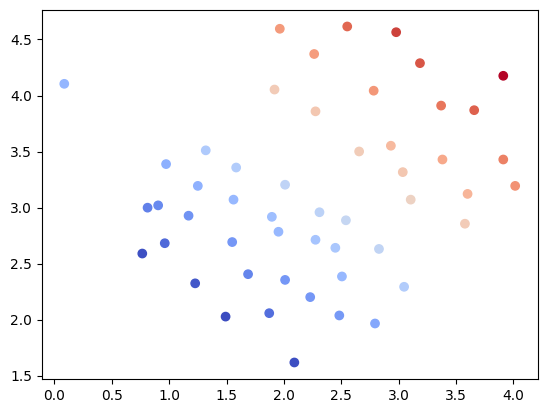

In [15]:
plt.scatter(df['x1'], df['x2'], c=conf_level, cmap="coolwarm")

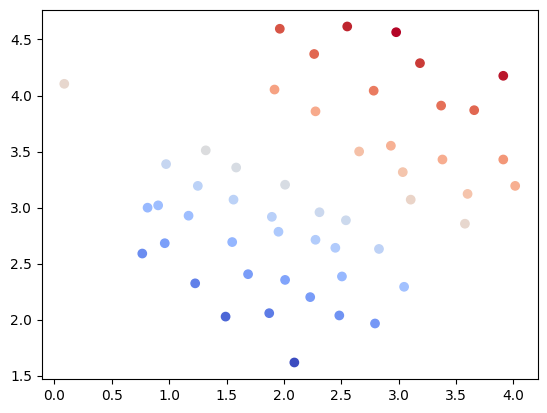

In [16]:
conf_level = svc_2.decision_function(X)
conf_level

plt.scatter(df['x1'], df['x2'], c=conf_level, cmap="coolwarm")

#### 9. Do the same with the second model

https://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/

#### 1. Load the data `ejer_1_data2.mat`

In [17]:
mat = scipy.io.loadmat('data/ejer_1_data2.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0.107143 , 0.60307  ],
        [0.093318 , 0.649854 ],
        [0.0979263, 0.705409 ],
        ...,
        [0.975806 , 0.439474 ],
        [0.989631 , 0.425439 ],
        [0.996544 , 0.414912 ]], shape=(863, 2)),
 'y': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
    

In [18]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

#### 2. Create a DataFrame with the features and target

In [19]:
df = pd.DataFrame(mat['X'], columns=['x1','x2'])
df['y'] = mat['y']
df

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1
...,...,...,...
858,0.994240,0.516667,1
859,0.964286,0.472807,1
860,0.975806,0.439474,1
861,0.989631,0.425439,1


In [20]:
df['y'].value_counts()

y
1    480
0    383
Name: count, dtype: int64

#### 3. Plot a scatterplot with the data

<Axes: xlabel='x1', ylabel='x2'>

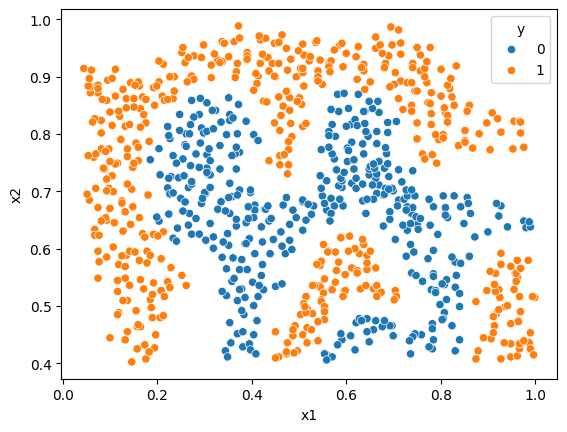

In [21]:
sns.scatterplot(data=df, x="x1", y="x2", hue="y")

In [22]:
X = df[['x1',"x2"]]
y = df['y']

/home/david/The_Bridge/2025-10-DS-FT-BIL/2025-OCT-BILBAO-FT-Data-Science/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


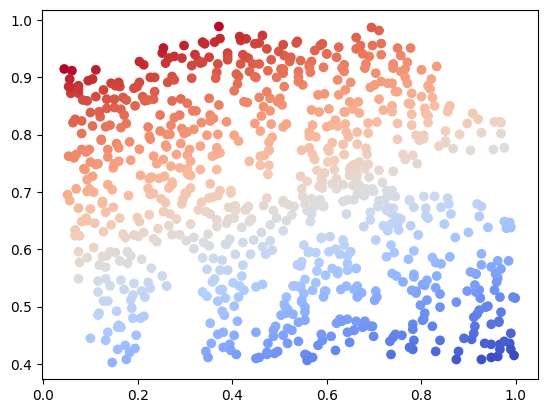

In [23]:
svc_l = LinearSVC(C=1000, loss='hinge', max_iter=1000000)

svc_l.fit(X, y)
svc_l.score(X,y)

conf_level = svc_l.decision_function(X)



plt.scatter(df['x1'], df['x2'], c=conf_level, cmap="coolwarm")


For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data.  To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label.  We'll see from the result that it gets most of them right.

#### 4. Declare a SVC with this hyperparameters
```Python
SVC(C=100, gamma=10, probability=True)
```


In [24]:
from sklearn.svm import SVC

svc_3 = SVC(C=100, gamma=10, probability=True)

#### 5. Fit the classifier and get the score

In [25]:
svc_3.fit(X,y)

,C,100
,kernel,'rbf'
,degree,3
,gamma,10
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [26]:
svc_3.score(X,y)

0.9698725376593279

#### 6. Plot the scatter plot and probability of predicting 0 with a [sequential color](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

In [27]:
y_pred_proba = svc_3.predict_proba(X)
y_pred_proba

array([[3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00],
       ...,
       [3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00]], shape=(863, 2))

In [28]:
y_pred_proba[:,1]

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 9.99998495e-01,
       9.92708932e-01, 9.96667953e-01, 9.99999789e-01, 9.86919651e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 9.84818575e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 9.99999999e-01,
       7.32863789e-01, 4.11747920e-01, 1.00000000e+00, 1.00000000e+00,
       9.82384249e-01, 9.97433502e-01, 9.89196076e-01, 8.64384612e-01,
       9.77830701e-01, 9.99995553e-01, 9.99997711e-01, 9.99999441e-01,
       9.99993623e-01, 9.72580484e-01, 8.23673237e-01, 9.66615924e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 9.99999999e-01, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 9.99999987e-01, 9.99999613e-01,
       9.97449968e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
      

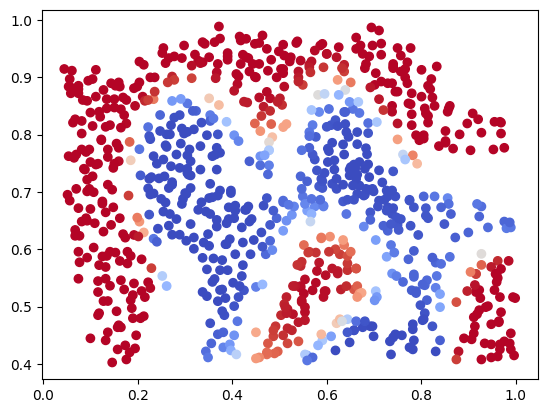

In [29]:
plt.scatter(df["x1"], df["x2"], c=y_pred_proba[:,1], cmap="coolwarm")

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(690, 2)
(173, 2)
(690,)
(173,)


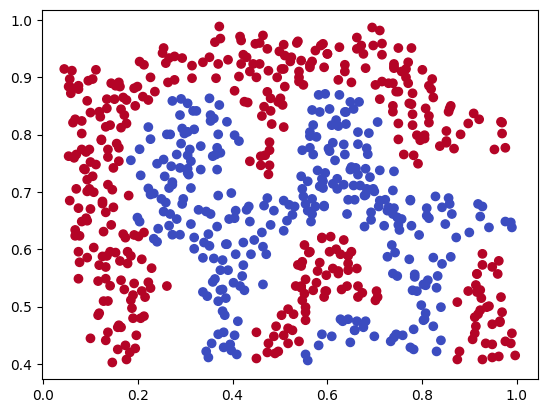

In [32]:
plt.scatter(X_train["x1"], X_train['x2'], c=y_train, cmap="coolwarm")

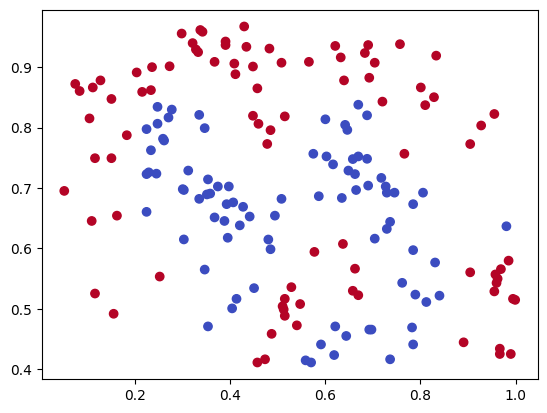

In [33]:
plt.scatter(X_test["x1"], X_test['x2'], c=y_test, cmap="coolwarm")

In [34]:
parameters ={"kernel": ["rbf", "poly"],
             "C": [10,100,500]}

gs = GridSearchCV(svc_3, parameters, cv=5, scoring="accuracy", n_jobs=-1, verbose=5)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 2/5] END ..................C=10, kernel=rbf;, score=0.942 total time=   0.1s
[CV 3/5] END ..................C=10, kernel=rbf;, score=0.913 total time=   0.1s
[CV 2/5] END .................C=100, kernel=rbf;, score=0.971 total time=   0.1s
[CV 1/5] END ..................C=10, kernel=rbf;, score=0.935 total time=   0.1s
[CV 1/5] END .................C=100, kernel=rbf;, score=0.949 total time=   0.1s
[CV 5/5] END ..................C=10, kernel=rbf;, score=0.942 total time=   0.1s
[CV 4/5] END .................C=100, kernel=rbf;, score=0.935 total time=   0.1s
[CV 1/5] END .................C=500, kernel=rbf;, score=0.971 total time=   0.1s
[CV 3/5] END .................C=500, kernel=rbf;, score=0.971 total time=   0.1s
[CV 2/5] END .................C=500, kernel=rbf;, score=0.964 total time=   0.1s
[CV 4/5] END ..................C=10, kernel=rbf;, score=0.928 total time=   0.1s
[CV 5/5] END .................C=100, kernel=rbf;,

,estimator,"SVC(C=100, ga...bability=True)"
,param_grid,"{'C': [10, 100, ...], 'kernel': ['rbf', 'poly']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,5
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,500


In [35]:
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

SVC(C=500, gamma=10, probability=True)
{'C': 500, 'kernel': 'rbf'}
0.9652173913043478


In [36]:
final_model = gs.best_estimator_
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [37]:
y_pred_proba = final_model.predict_proba(X_test)

In [38]:
preds = y_pred_proba[:,1]

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [40]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9826589595375722
[[85  0]
 [ 3 85]]


In [41]:
results_cv = cross_val_score(final_model, X, y, cv=10, scoring="accuracy")
print(results_cv)
print(results_cv.mean())
print(results_cv.std())

[0.96551724 0.96551724 0.96551724 1.         0.97674419 0.84883721
 0.97674419 0.8255814  0.79069767 0.86046512]
0.9175621491579792
0.07296460880852135


In [42]:
final_model

,C,500
,kernel,'rbf'
,degree,3
,gamma,10
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [53]:
#y_pred_proba = final_model.predict_proba(X)
#y_pred_proba[:,1]

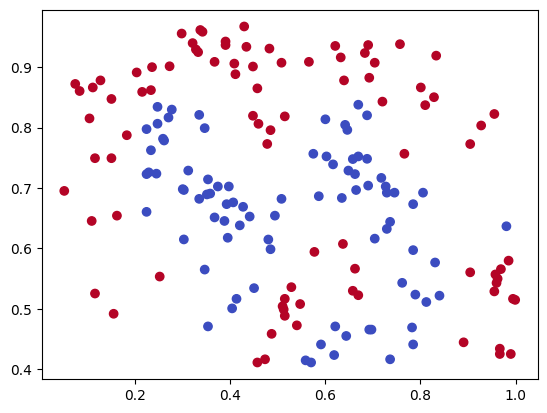

In [43]:
plt.scatter(X_test["x1"], X_test['x2'], c=y_test, cmap="coolwarm")

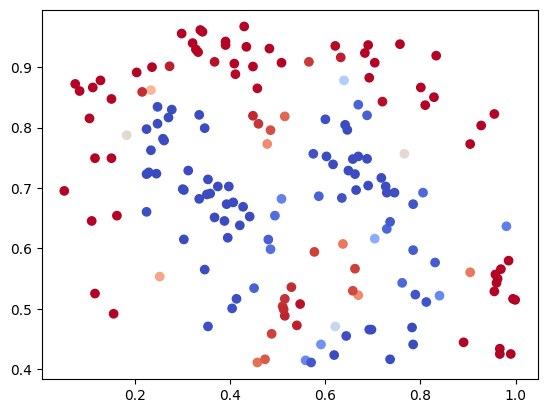

In [44]:
plt.scatter(X_test["x1"], X_test['x2'], c=preds, cmap="coolwarm")